# Homework 3 - Simple Momentum Strategy

1. Download daily price data for QQQ, TLT, GLD, RWO from yahoo finance since 2016-01-01. Using the adjusted close price data, compute daily returns. This should be a DataFrame with index=date, columns=ticker and values=daily returns.

In [82]:
import yfinance as yf
import pandas as pd
import numpy as np
import math

In [83]:
univ = ['QQQ', 'TLT', 'GLD', 'RWO']
stock_px = yf.download(univ, start='2016-01-01')
stock_px

[*********************100%***********************]  4 of 4 completed


Price                       Adj Close                                    \
Ticker                            GLD         QQQ        RWO        TLT   
Date                                                                      
2016-01-04 00:00:00+00:00  102.889999  102.527115  33.888802  97.874329   
2016-01-05 00:00:00+00:00  103.180000  102.349228  34.299397  97.479454   
2016-01-06 00:00:00+00:00  104.669998  101.366089  34.035446  98.793060   
2016-01-07 00:00:00+00:00  106.150002   98.191963  33.426876  98.970322   
2016-01-08 00:00:00+00:00  105.680000   97.386742  32.920971  99.413589   
...                               ...         ...        ...        ...   
2024-10-14 00:00:00+00:00  245.070007  497.500000  46.320000  93.769997   
2024-10-15 00:00:00+00:00  245.919998  490.850006  46.599998  94.910004   
2024-10-16 00:00:00+00:00  247.149994  490.910004  47.119999  95.309998   
2024-10-17 00:00:00+00:00  248.630005  491.250000  46.790001  93.800003   
2024-10-18 00:00:00+00:00  251.270004  494.470001  47.020000  93.870003   

Price                           Close                                     \
Ticker                            GLD         QQQ        RWO         TLT   
Date                                                                       
2016-01-04 00:00:00+00:00  102.889999  109.500000  46.220001  121.449997   
2016-01-05 00:00:00+00:00  103.180000  109.309998  46.779999  120.959999   
2016-01-06 00:00:00+00:00  104.669998  108.260002  46.419998  122.589996   
2016-01-07 00:00:00+00:00  106.150002  104.870003  45.590000  122.809998   
2016-01-08 00:00:00+00:00  105.680000  104.010002  44.900002  123.360001   
...                               ...         ...        ...         ...   
2024-10-14 00:00:00+00:00  245.070007  497.500000  46.320000   93.769997   
2024-10-15 00:00:00+00:00  245.919998  490.850006  46.599998   94.910004   
2024-10-16 00:00:00+00:00  247.149994  490.910004  47.119999   95.309998   
2024-10-17 00:00:00+00:00  248.630005  491.250000  46.790001   93.800003   
2024-10-18 00:00:00+00:00  251.270004  494.470001  47.020000   93.870003   

Price                            High              ...        Low              \
Ticker                            GLD         QQQ  ...        RWO         TLT   
Date                                               ...                          
2016-01-04 00:00:00+00:00  103.669998  109.599998  ...  45.750000  121.320000   
2016-01-05 00:00:00+00:00  103.459999  110.180000  ...  46.209999  120.660004   
2016-01-06 00:00:00+00:00  104.800003  108.889999  ...  46.230000  122.050003   
2016-01-07 00:00:00+00:00  106.239998  107.290001  ...  45.520000  121.790001   
2016-01-08 00:00:00+00:00  105.800003  106.290001  ...  44.799999  122.230003   
...                               ...         ...  ...        ...         ...   
2024-10-14 00:00:00+00:00  245.860001  498.829987  ...  45.970001   92.980003   
2024-10-15 00:00:00+00:00  246.550003  498.500000  ...  46.369999   94.370003   
2024-10-16 00:00:00+00:00  248.089996  491.690002  ...  46.730000   95.139999   
2024-10-17 00:00:00+00:00  249.059998  496.489990  ...  46.770000   93.669998   
2024-10-18 00:00:00+00:00  251.369995  495.570007  ...  46.779999   93.860001   

Price                            Open                                     \
Ticker                            GLD         QQQ        RWO         TLT   
Date                                                                       
2016-01-04 00:00:00+00:00  103.129997  109.449997  46.110001  121.930000   
2016-01-05 00:00:00+00:00  103.129997  110.040001  46.209999  120.879997   
2016-01-06 00:00:00+00:00  104.370003  107.410004  46.349998  122.300003   
2016-01-07 00:00:00+00:00  105.830002  105.949997  45.900002  122.680000   
2016-01-08 00:00:00+00:00  105.480003  105.629997  45.689999  122.430000   
...                               ...         ...        ...         ...   
2024-10-14 00:00:00+00:00  245.160004  495.769989  46.020000   93

In [84]:
adj_close = stock_px['Adj Close']
returns = adj_close / adj_close.shift() - 1
returns

Ticker,GLD,QQQ,RWO,TLT
Date,,,,
2016-01-04 00:00:00+00:00,NaN,NaN,NaN,NaN
2016-01-05 00:00:00+00:00,0.002819,-0.001735,0.012116,-0.004035
2016-01-06 00:00:00+00:00,0.014441,-0.009606,-0.007695,0.013476
2016-01-07 00:00:00+00:00,0.014140,-0.031313,-0.017880,0.001794
2016-01-08 00:00:00+00:00,-0.004428,-0.008200,-0.015135,0.004479
...,...,...,...,...
2024-10-14 00:00:00+00:00,-0.001630,0.008391,0.003032,0.000747
2024-10-15 00:00:00+00:00,0.003468,-0.013367,0.006045,0.012157
2024-10-16 00:00:00+00:00,0.005002,0.000122,0.011159,0.004214


<Axes: xlabel='Date'>

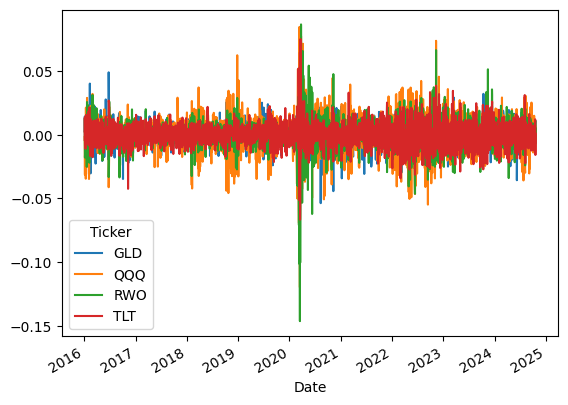

In [85]:
returns.plot()

2. Compute the signal. Complete the compute_momentum function which computes a simple momentum signal. The function takes in a DataFrame with index = date, columns=ticker and values containing daily returns. It returns a new DataFrame with index = date, columns=ticker and values containing the momentum signal for the ticker on that day. The momentum signal for each ticker is defined as the annualized sharpe ratio of the past 252 days.

In [86]:
def compute_momentum(ret):
    # fill out the body here
    # return a DataFrame "momentum" containing a simple momentum indicator 
    momentum = ret.rolling(252).mean()/ret.rolling(252).std()*math.sqrt(252)
    return momentum

In [87]:
momentum = compute_momentum(ret=returns)
momentum

Ticker,GLD,QQQ,RWO,TLT
Date,,,,
2016-01-04 00:00:00+00:00,NaN,NaN,NaN,NaN
2016-01-05 00:00:00+00:00,NaN,NaN,NaN,NaN
2016-01-06 00:00:00+00:00,NaN,NaN,NaN,NaN
2016-01-07 00:00:00+00:00,NaN,NaN,NaN,NaN
2016-01-08 00:00:00+00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2024-10-14 00:00:00+00:00,2.475150,1.813121,1.508452,0.879248
2024-10-15 00:00:00+00:00,2.330061,1.807921,1.576621,0.845392
2024-10-16 00:00:00+00:00,2.401506,1.747160,1.587332,0.981410


3. Create a portfolio. Complete the function compute_portfolio. This function takes as input the DataFrame "momentum" from above. It returns a new DataFrame "portfolio" which has the same index/columns and has as values portfolio weights. The weights are computed as follows. On each date, equal-weight long the tickers with a momentum signal above 1.

In [88]:
def compute_portfolio(momentum):
    # fill out the body here
    # return a DataFrame "portfolio" containing portfolio weights
    portfolio = (momentum > 1)*1
    portfolio = portfolio.div(portfolio.abs().sum(1), 0)

    return portfolio

portfolio = compute_portfolio(momentum)
portfolio

Ticker,GLD,QQQ,RWO,TLT
Date,,,,
2016-01-04 00:00:00+00:00,NaN,NaN,NaN,NaN
2016-01-05 00:00:00+00:00,NaN,NaN,NaN,NaN
2016-01-06 00:00:00+00:00,NaN,NaN,NaN,NaN
2016-01-07 00:00:00+00:00,NaN,NaN,NaN,NaN
2016-01-08 00:00:00+00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2024-10-14 00:00:00+00:00,0.333333,0.333333,0.333333,0.00
2024-10-15 00:00:00+00:00,0.333333,0.333333,0.333333,0.00
2024-10-16 00:00:00+00:00,0.333333,0.333333,0.333333,0.00


4. Portfolio returns. Using the "portfolio" returned in part(3) and the returns generated in part(1), compute the returns to the simple momentum strategy. 
- What is the annualized sharpe ratio of the strategy? 
- How about the annualized sharpe ratio within each year? 
- How correlated is the strategy with the underlying tickers?
- Plot the cumulative sum of the returns through time

In [89]:
strategy_returns = (portfolio.shift() * returns).sum(1)
strategy_returns = strategy_returns.loc[momentum.dropna().index[0]:]
strategy_returns


Date
2017-01-03 00:00:00+00:00    0.000000
2017-01-04 00:00:00+00:00    0.000000
2017-01-05 00:00:00+00:00    0.000000
2017-01-06 00:00:00+00:00    0.000000
2017-01-09 00:00:00+00:00    0.003281
                               ...   
2024-10-14 00:00:00+00:00    0.003265
2024-10-15 00:00:00+00:00   -0.001285
2024-10-16 00:00:00+00:00    0.005428
2024-10-17 00:00:00+00:00   -0.000107
2024-10-18 00:00:00+00:00    0.007363
Length: 1962, dtype: float64

In [92]:
sharpe = strategy_returns.mean()/strategy_returns.std() * math.sqrt(252)
sharpe

np.float64(1.1154703818975364)

In [93]:
sharpe = lambda x: x.mean()/x.std()*math.sqrt(252)
strategy_returns.groupby([x.year for x in strategy_returns.index]).apply(sharpe)

2017    2.670453
2018   -0.024996
2019    1.015504
2020    1.528310
2021    1.411045
2022   -0.737299
2023    1.171865
2024    2.393485
dtype: float64

In [94]:
returns.corrwith(strategy_returns)

Ticker
GLD    0.331253
QQQ    0.459877
RWO    0.246843
TLT    0.201913
dtype: float64

In [95]:
returns.corr()

Ticker,GLD,QQQ,RWO,TLT
Ticker,,,,
GLD,1.000000,0.065056,0.154515,0.323296
QQQ,0.065056,1.000000,0.602735,-0.132527
RWO,0.154515,0.602735,1.000000,-0.009581
TLT,0.323296,-0.132527,-0.009581,1.000000


<Axes: xlabel='Date'>

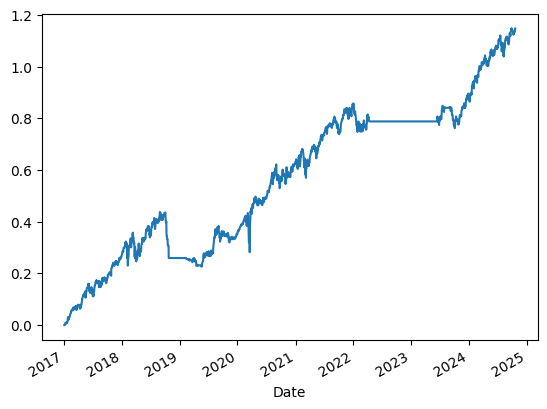

In [96]:
strategy_returns.cumsum().plot()

<Axes: xlabel='Date'>

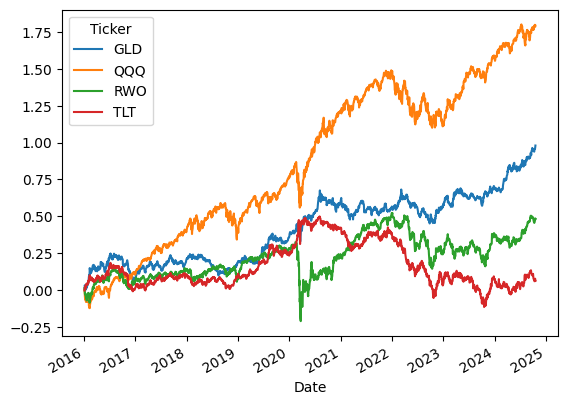

In [99]:
returns.cumsum().plot()

In [100]:
returns

Ticker,GLD,QQQ,RWO,TLT
Date,,,,
2016-01-04 00:00:00+00:00,NaN,NaN,NaN,NaN
2016-01-05 00:00:00+00:00,0.002819,-0.001735,0.012116,-0.004035
2016-01-06 00:00:00+00:00,0.014441,-0.009606,-0.007695,0.013476
2016-01-07 00:00:00+00:00,0.014140,-0.031313,-0.017880,0.001794
2016-01-08 00:00:00+00:00,-0.004428,-0.008200,-0.015135,0.004479
...,...,...,...,...
2024-10-14 00:00:00+00:00,-0.001630,0.008391,0.003032,0.000747
2024-10-15 00:00:00+00:00,0.003468,-0.013367,0.006045,0.012157
2024-10-16 00:00:00+00:00,0.005002,0.000122,0.011159,0.004214
